<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-2/blob/main/P3_AIML425_Assn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

num_samples = 100000

# Uniform distribution
y = np.random.uniform(-1, 1, num_samples)

# Split data into train, test, validation
train_y = y[:int(0.7 * num_samples)]
test_y = y[int(0.7 * num_samples):int(0.85 * num_samples)]
val_y = y[int(0.85 * num_samples):]


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()


In [ ]:
criterion = torch.nn.MSELoss()  # mean squared error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Target 2D Gaussian
mu = [0, 0]
cov = [[1, 0], [0, 1]]

epochs = 50
batch_size = 128

for epoch in range(epochs):
    for i in range(0, len(train_y), batch_size):
        y_batch = torch.tensor(train_y[i:i+batch_size]).float().unsqueeze(-1)
        z_target = torch.tensor(np.random.multivariate_normal(mu, cov, len(y_batch))).float()

        optimizer.zero_grad()
        outputs = model(y_batch)
        loss = criterion(outputs, z_target)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/50, Loss: 1.0032
Epoch 2/50, Loss: 0.9444
Epoch 3/50, Loss: 0.9922
Epoch 4/50, Loss: 0.9651
Epoch 5/50, Loss: 0.9622
Epoch 6/50, Loss: 0.9591
Epoch 7/50, Loss: 0.8842
Epoch 8/50, Loss: 0.9194
Epoch 9/50, Loss: 1.0790
Epoch 10/50, Loss: 1.0012
Epoch 11/50, Loss: 0.9061
Epoch 12/50, Loss: 1.0448
Epoch 13/50, Loss: 1.0143
Epoch 14/50, Loss: 1.0349
Epoch 15/50, Loss: 0.9971
Epoch 16/50, Loss: 0.9882
Epoch 17/50, Loss: 0.9457
Epoch 18/50, Loss: 1.0264
Epoch 19/50, Loss: 0.9775
Epoch 20/50, Loss: 1.1552
Epoch 21/50, Loss: 0.9878
Epoch 22/50, Loss: 0.9854
Epoch 23/50, Loss: 1.1436
Epoch 24/50, Loss: 1.0444
Epoch 25/50, Loss: 1.0120
Epoch 26/50, Loss: 1.0545
Epoch 27/50, Loss: 0.7677
Epoch 28/50, Loss: 0.8124
Epoch 29/50, Loss: 0.8288
Epoch 30/50, Loss: 1.1209
Epoch 31/50, Loss: 0.9085
Epoch 32/50, Loss: 0.9995
Epoch 33/50, Loss: 1.0587
Epoch 34/50, Loss: 1.0249
Epoch 35/50, Loss: 0.9001
Epoch 36/50, Loss: 0.9101
Epoch 37/50, Loss: 0.9671
Epoch 38/50, Loss: 1.0263
Epoch 39/50, Loss: 1.

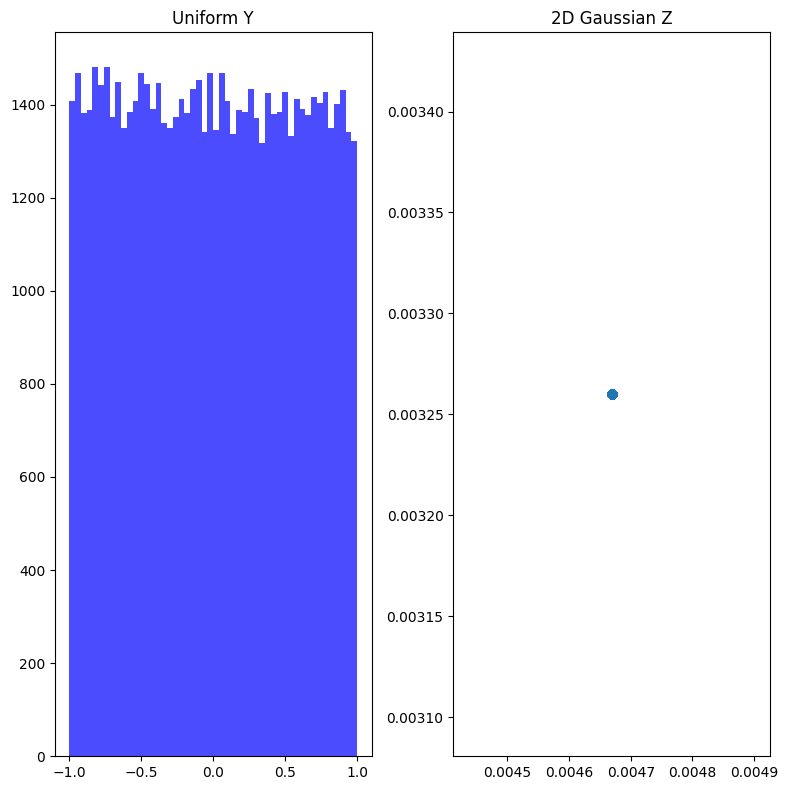

In [ ]:
import matplotlib.pyplot as plt

# Convert train data to 2D Gaussian
z_out = model(torch.tensor(train_y).float().unsqueeze(-1)).detach().numpy()

plt.figure(figsize=(8, 8))

# Plot original 1D Uniform Y
plt.subplot(1, 2, 1)
plt.hist(train_y, bins=50, color='blue', alpha=0.7)
plt.title("Uniform Y")

# Plot converted 2D Gaussian Z
plt.subplot(1, 2, 2)
plt.scatter(z_out[:, 0], z_out[:, 1], alpha=0.5)
plt.title("2D Gaussian Z")
plt.tight_layout()
plt.show()


# other color plot sample

## Vector Field Plots:
Arrows indicating the movement of each data point from the input to the output.
Advantage: Helps to see the overall direction and magnitude of transformation on data points.

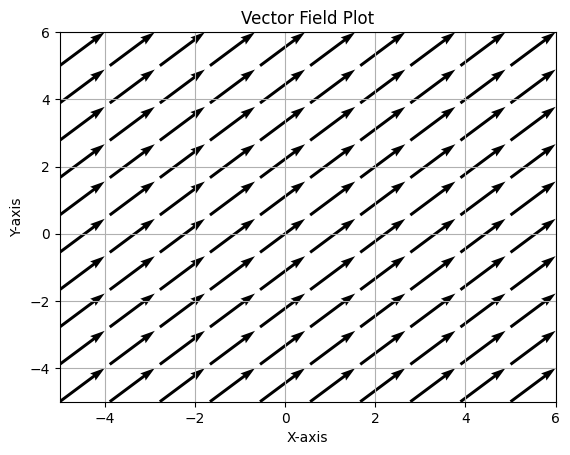

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a grid of points
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

X, Y = np.meshgrid(x, y)

# Sample transformation: for illustration purposes,
# let's assume a simple transformation that moves points to the right and upwards.
U = 1  # horizontal movement
V = 1  # vertical movement

# Plot the vector field
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
plt.xlim([-5, 6])
plt.ylim([-5, 6])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Vector Field Plot")
plt.grid()
plt.show()


## 2D Color Scatter Plots:
X and Y axes: These represent the two dimensions of the Gaussian data.
Color: This can represent the density of data points or another relevant metric.
Advantage: You can directly visualize how data points move from one layer to the next and how they get transformed.

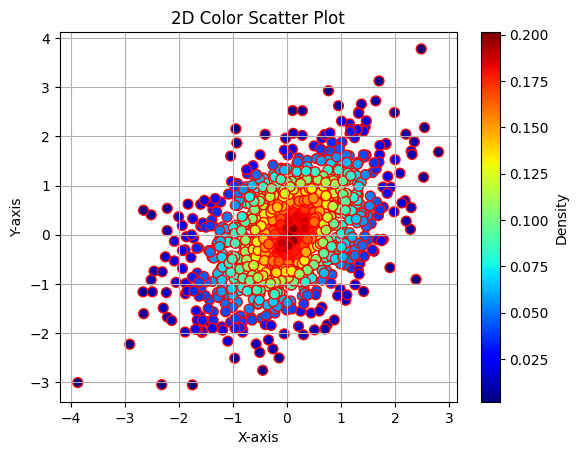

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate synthetic Gaussian data for demonstration
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)
x = data[:, 0]
y = data[:, 1]

# Compute the point densities to determine color
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=50, edgecolor='Red', cmap='jet')
plt.colorbar(scatter, ax=ax, label='Density')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Color Scatter Plot')
plt.grid()
plt.show()


## Heatmaps:
Represent the data density in different regions of the input space.
Darker colors could represent higher densities, while lighter colors represent lower densities.
Advantage: Useful for visualizing how the distribution of data changes after being passed through the concatenated networks.

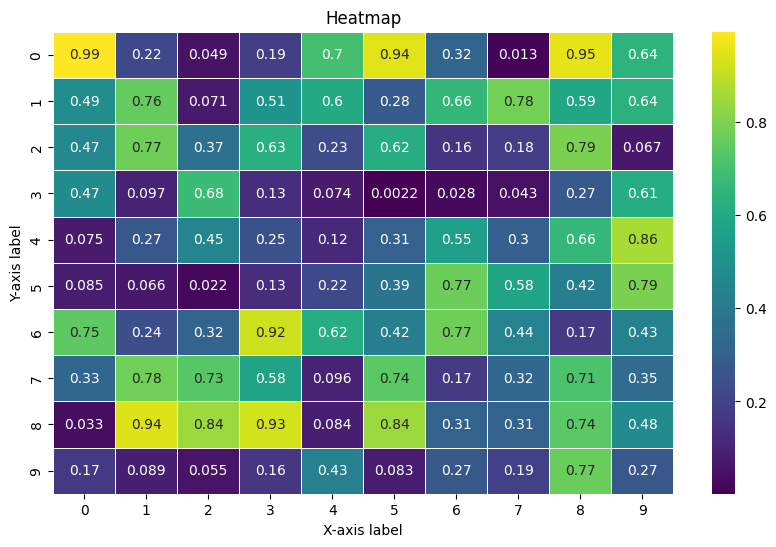

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data: a 2D array. This could represent, for example, a 2D histogram.
data = np.random.rand(10, 10)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, cmap='viridis', annot=True, linewidths=.5)
plt.title("Heatmap")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.show()


## Contour Plots.  Contour plots are used to represent a 3D surface in two dimensions using contour lines. Each contour line represents points of the same value. This will provide you with a visualization where each contour line represents points of the same Z value. Contour Plots:
Like heatmaps, but use contour lines to indicate regions of equal data density.
Advantage: Provides a clear boundary representation of data densities.

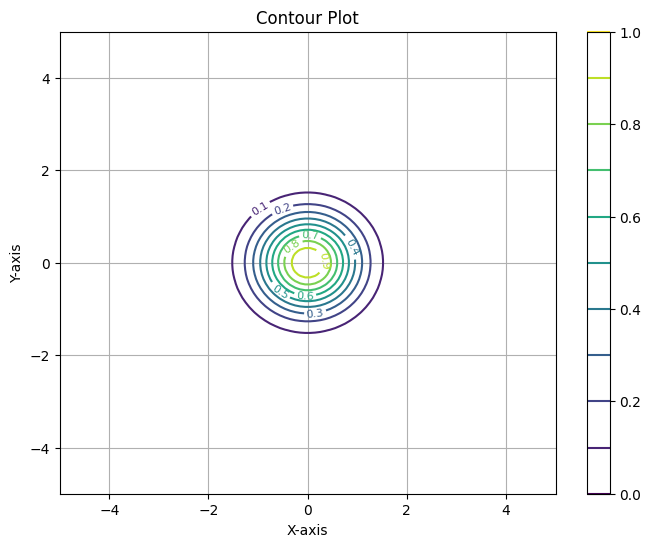

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# For demonstration, let's create a simple 2D Gaussian function as our Z values
Z = np.exp(-X**2 - Y**2)

# Create contour plot
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=10, cmap='viridis')  # `levels` determines the number of contour lines # We've used the viridis colormap, but you can choose others like 'plasma', 'inferno', etc.
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.title("Contour Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()


Color plot summary: if only chise one, 2D color scatter plot would be the option. Vector Field Plots worth to try. But, heatmap looks not good for continue variable result analysis,, at last Vector Field Plots hard to explain.

# sample of 2D Scatter plot of two result from model with different regrlarization strongth.

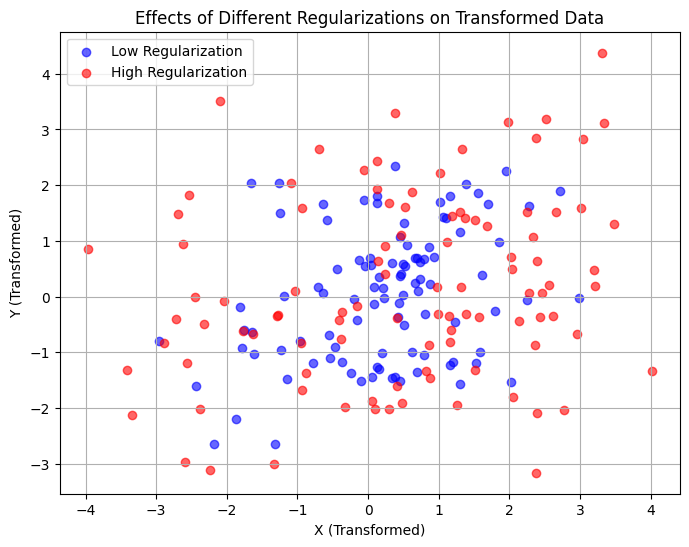

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D Gaussian input data
num_points = 100
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], num_points)

# Mock transformed data for two concatenated networks with different L2 regularizations
# For demonstration purposes, we'll just add some random offsets
data_transformed_1 = data + np.random.normal(0, 0.5, data.shape)  # Simulating effect of first network
data_transformed_2 = data + np.random.normal(0, 1.5, data.shape)  # Simulating effect of second network with stronger regularization

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data_transformed_1[:, 0], data_transformed_1[:, 1], c='blue', label='Low Regularization', alpha=0.6)
plt.scatter(data_transformed_2[:, 0], data_transformed_2[:, 1], c='red', label='High Regularization', alpha=0.6)
plt.title('Effects of Different Regularizations on Transformed Data')
plt.xlabel('X (Transformed)')
plt.ylabel('Y (Transformed)')
plt.legend()
plt.grid(True)
plt.show()
